In [3]:
# --- 1. Importación de librerías ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# --- 2. Carga de datos ---
df = pd.read_csv('Pokemon.csv')
print("Columnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [5]:
# --- 3. Selección de estadísticas relevantes ---
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df_stats = df[stats_cols]


In [6]:
# --- 4. Normalización de datos ---
scaler = StandardScaler()
scaled_stats = scaler.fit_transform(df_stats)


In [7]:
# --- 5. Aplicación de K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_stats)

In [8]:
# --- 6. Reducción de dimensionalidad con PCA ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_stats)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

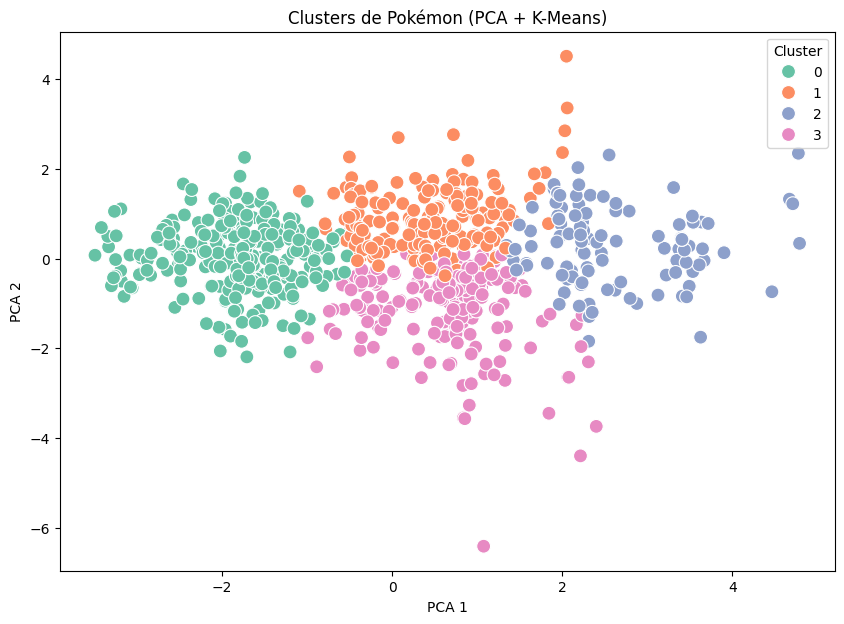

In [9]:
# --- 7. Visualización 2D de clusters ---
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Clusters de Pokémon (PCA + K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

In [10]:
# --- 8. Análisis estadístico por cluster ---
cluster_summary = df.groupby('Cluster')[stats_cols].mean().round(1)
print("Resumen estadístico por cluster:")
print(cluster_summary)

Resumen estadístico por cluster:
           HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Cluster                                                
0        50.1    54.0     51.9     48.1     49.2   49.5
1        69.3    84.3     65.9     83.5     73.0   94.6
2        94.3   114.0     94.6    117.7    103.7   95.5
3        81.9    88.9    101.0     71.3     84.6   52.7


In [11]:
# --- 9. Asignar nombres creativos a los clusters ---
cluster_names = {
    0: 'Tanques Estratégicos',
    1: 'Cañones de Cristal',
    2: 'Equilibrados',
    3: 'Velocistas Frágiles'
}
df['ClusterName'] = df['Cluster'].map(cluster_names)

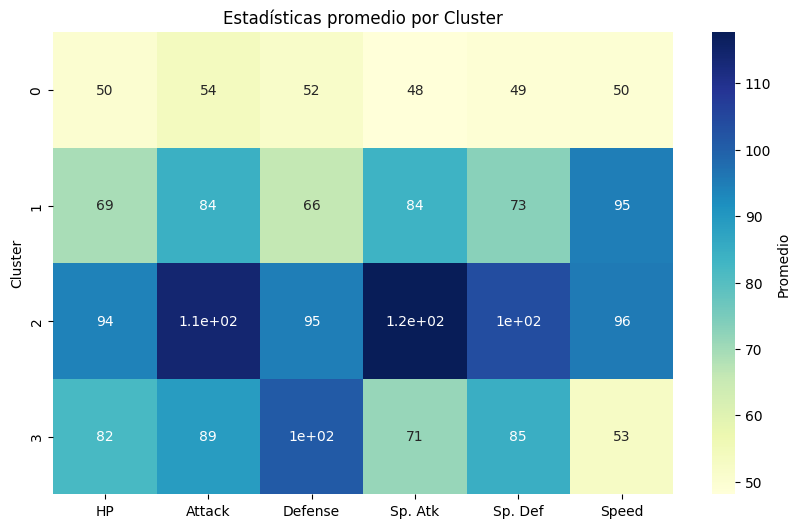

In [12]:
# --- 10. Heatmap comparativo de stats ---
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Promedio'})
plt.title("Estadísticas promedio por Cluster")
plt.show()

In [13]:
# --- 11. Análisis detallado de cada cluster ---
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i} - {cluster_names[i]}")
    print(row.sort_values(ascending=False))


Cluster 0 - Tanques Estratégicos
Attack     54.0
Defense    51.9
HP         50.1
Speed      49.5
Sp. Def    49.2
Sp. Atk    48.1
Name: 0, dtype: float64

Cluster 1 - Cañones de Cristal
Speed      94.6
Attack     84.3
Sp. Atk    83.5
Sp. Def    73.0
HP         69.3
Defense    65.9
Name: 1, dtype: float64

Cluster 2 - Equilibrados
Sp. Atk    117.7
Attack     114.0
Sp. Def    103.7
Speed       95.5
Defense     94.6
HP          94.3
Name: 2, dtype: float64

Cluster 3 - Velocistas Frágiles
Defense    101.0
Attack      88.9
Sp. Def     84.6
HP          81.9
Sp. Atk     71.3
Speed       52.7
Name: 3, dtype: float64


<Figure size 1200x600 with 0 Axes>

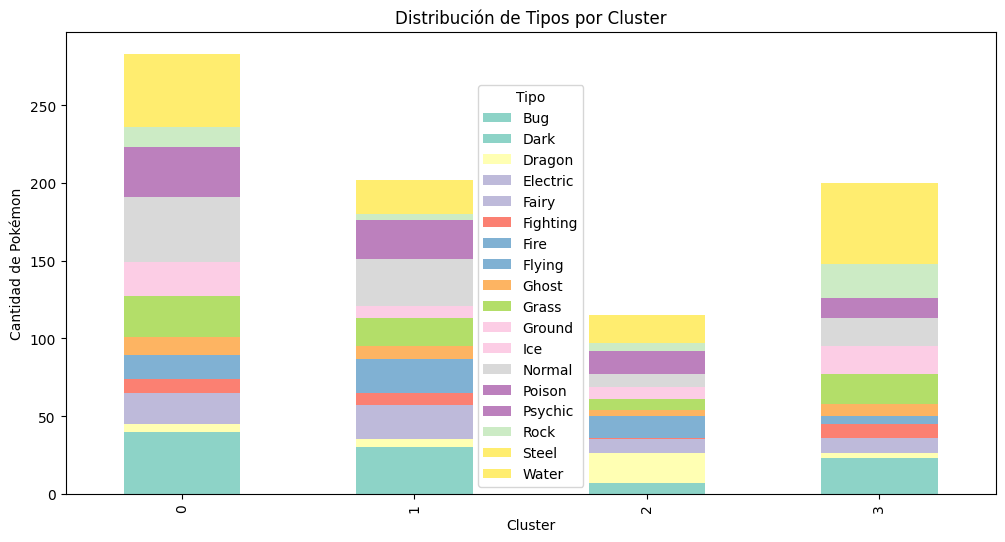

In [14]:
# --- 12. Visualización adicional: distribución de tipos por cluster ---
plt.figure(figsize=(12, 6))
cluster_types = df.groupby('Cluster')['Type 1'].value_counts().unstack().fillna(0)
cluster_types.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))
plt.title("Distribución de Tipos por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Pokémon")
plt.legend(title='Tipo')
plt.show()

In [15]:
# --- 13. ¿Dónde están los Pokémon legendarios? ---
legendary_distribution = df.groupby(['Cluster', 'Legendary']).size().unstack(fill_value=0)
print("\nDistribución de Pokémon legendarios por cluster:")
print(legendary_distribution)


Distribución de Pokémon legendarios por cluster:
Legendary  False  True 
Cluster                
0            283      0
1            199      3
2             57     58
3            196      4
